In [13]:
#We need to classify the patients between influenza COVID-19, classes zero and one respectively. We use the logistic regression method.

#Import the libraries
import pandas as pd
import numpy as np
import sklearn
# from sklearn.model_selection import GroupKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LassoCV
#from sklearn.linear_model import RidgeCV
#to plot
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')

#Import the data set
#Whole infection period
# dftrain = pd.read_csv("Without noise.csv")
# dftest = pd.read_csv("With noise,2,SFS.csv")
#For early days
dftrain = pd.read_csv("Without noise.csv")
dftest = pd.read_csv("Earlydays,2,100patients,4000.csv")
#######

In [14]:
#Define as an array
# Xtrain=dftrain[["T","I1","I2", "V", "F"]]
#For early days
Xtrain=dftrain[["I1","I2", "V", "F"]]
#Pandas Series.to_numpy() function is used to return a NumPy ndarray representing the values in given Series or Index.
# ytrain=dftrain['Flu/COVID'].to_numpy()
ytrain=dftrain['Flu/COVID']
timetrain=dftrain["Time Steps"]
IDtrain=dftrain["ID"]

# Xtest=dftest[["T","I1","I2", "V", "F"]]
#For early days
Xtest=dftest[["I1","I2", "V", "F"]]
# ytest=dftest['Flu/COVID'].to_numpy()
ytest=dftest['Flu/COVID']
timetest=dftest["Time Steps"]
IDtest=dftest["ID"]

In [15]:
Xtrain /= Xtrain.std(axis=0)
Xtest /= Xtest.std(axis=0)

In [16]:
#we uses cross validation to randomly choose the test data set
#5 different test set has been chosen
# gkf = GroupKFold(n_splits=5)
kf = KFold(n_splits=6)
#gkf should apply on training data not test data
#CV:cross validation
classifier=LassoCV(cv=kf.split(Xtrain, ytrain, IDtrain))
# classifier=LassoCV(cv=kf.split(Xtrain, ytrain))
#Ridge
# classifier=RidgeCV(cv=kf.split(Xtrain, ytrain, IDtrain))
clf = classifier.fit(Xtrain, ytrain)
#Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
#Measure to evaluate our built ML model
roc_auc_score(ytest, clf.predict(Xtest))

0.91116875

In [17]:
# print(clf.predict(Xtest))

<IPython.core.display.Javascript object>


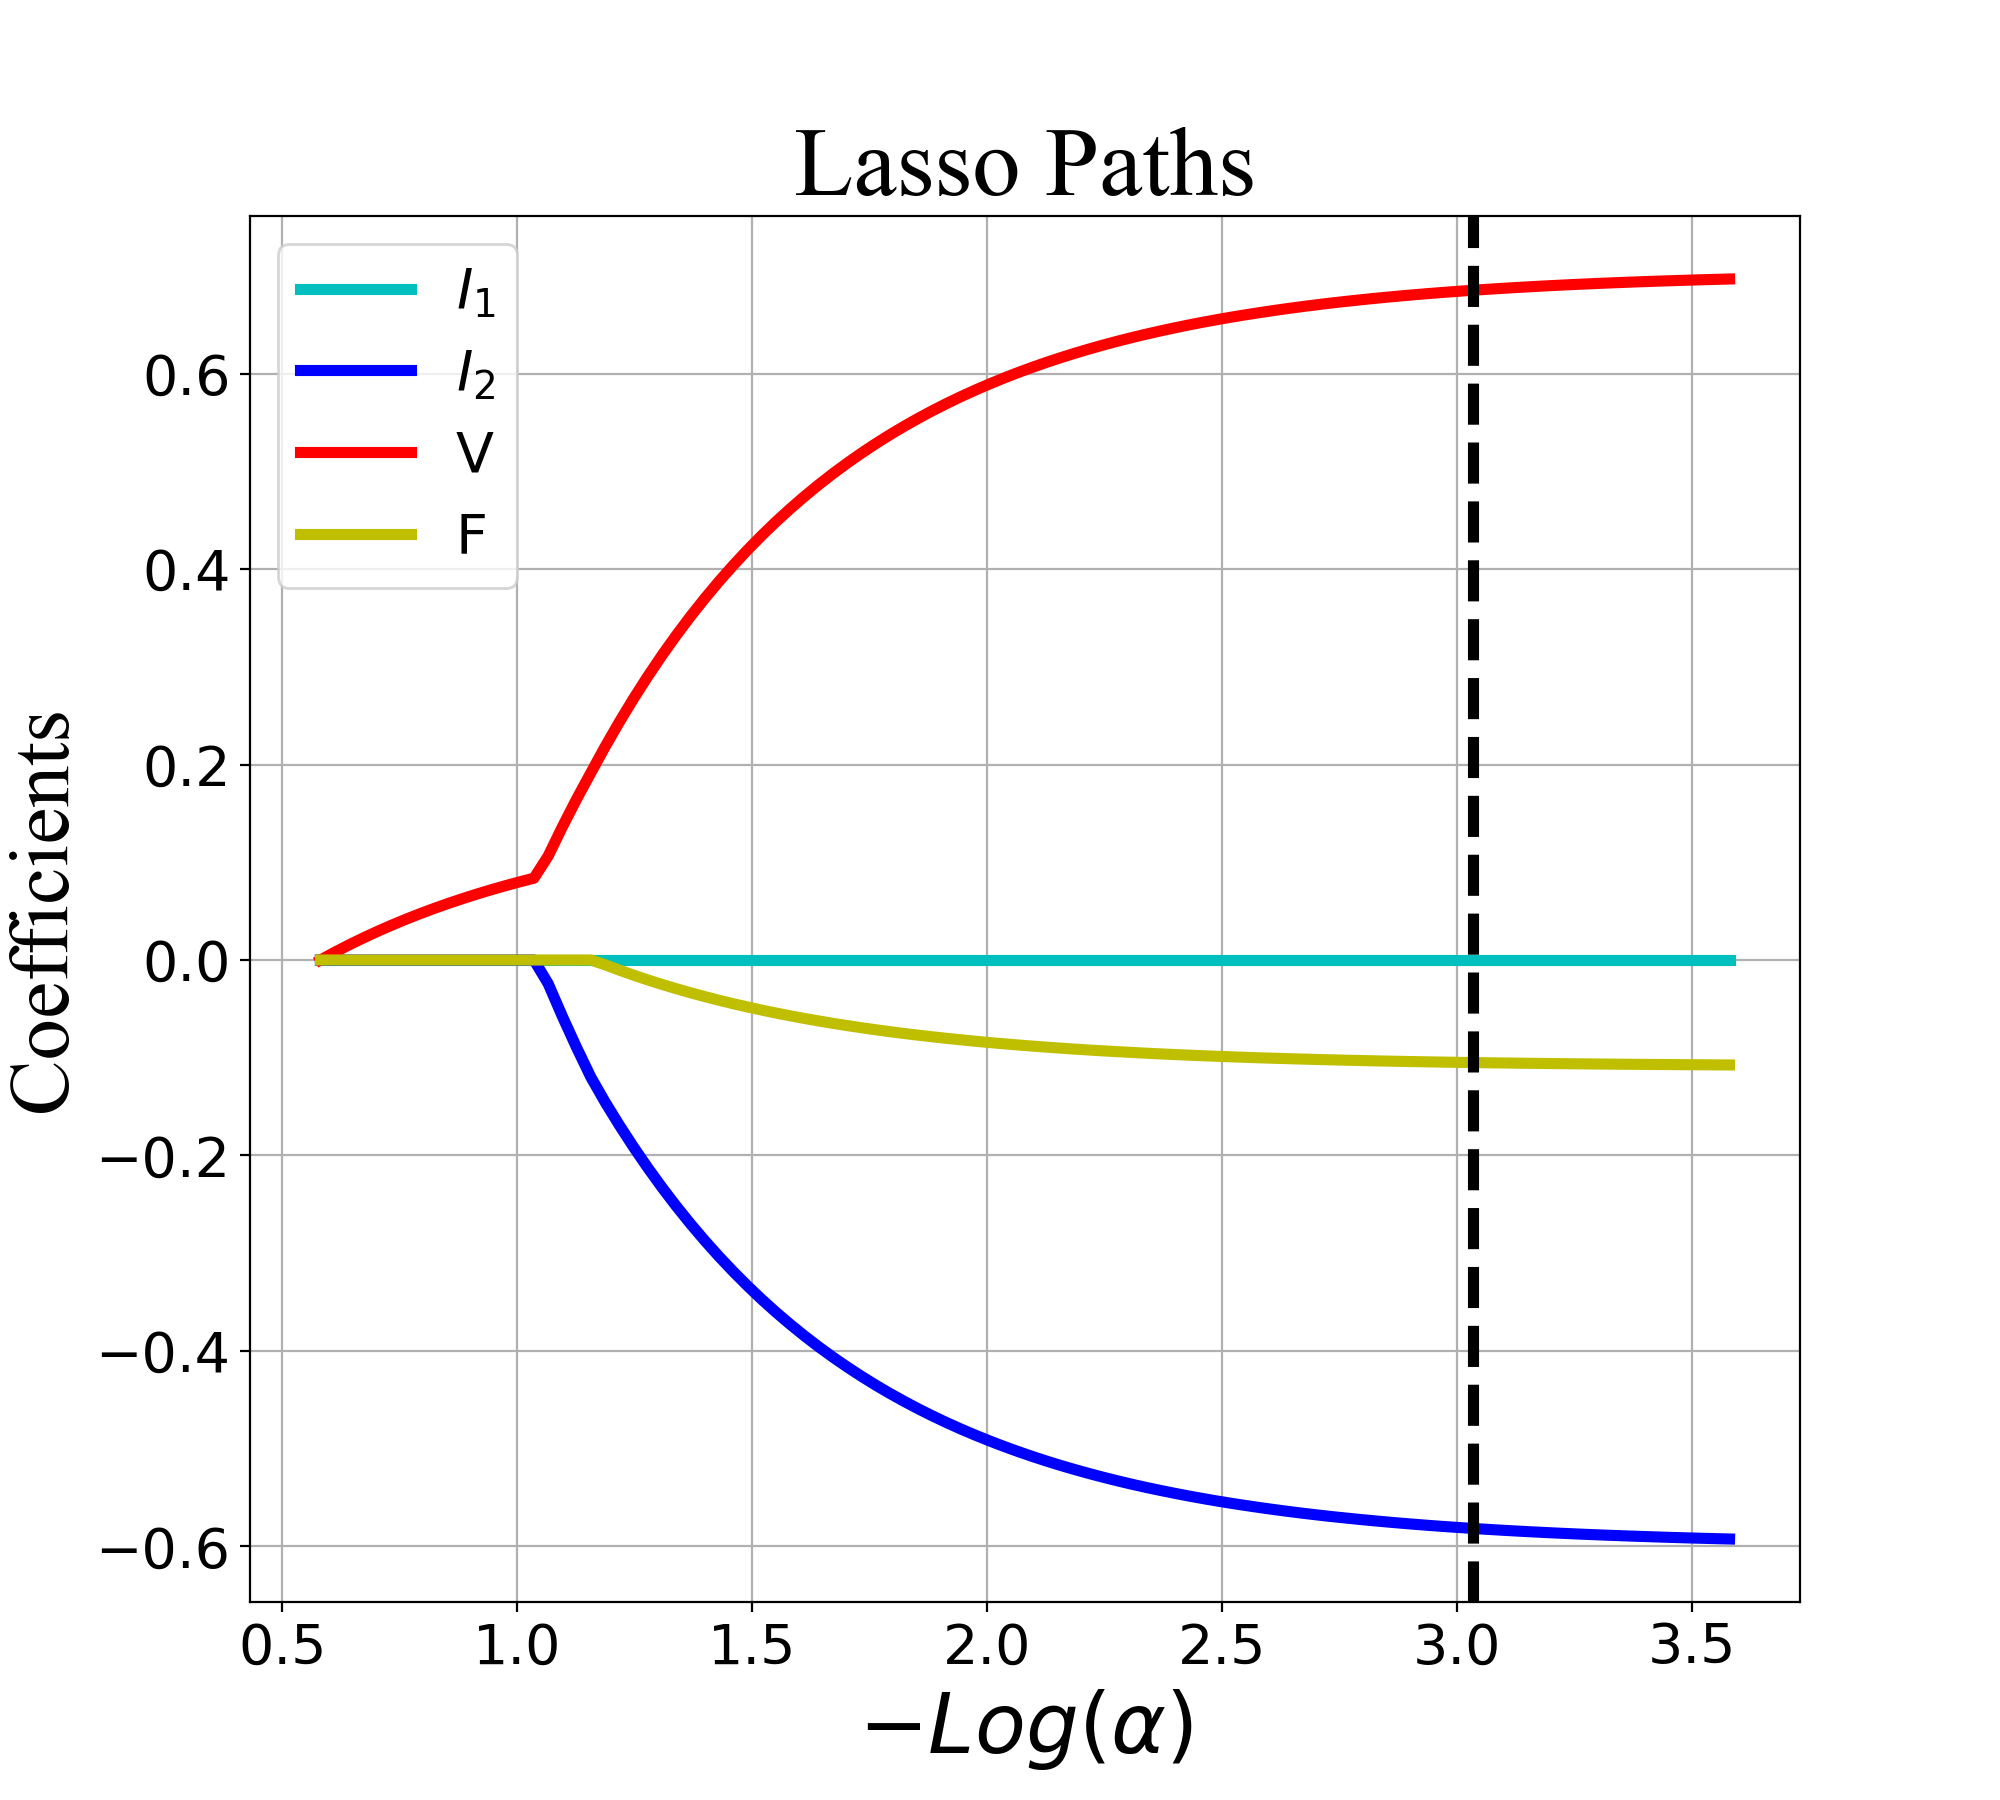

In [18]:
from sklearn.linear_model import lasso_path
from itertools import cycle
#Lasoo path: a regularization path is a plot of all coefficients values against the values of alphas . It's the best way to see the behavior of the Lasso Regression.


eps = 5e-3  # the smaller it is the longer is the path

#print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(Xtrain, ytrain, eps=eps)#https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html


plt.figure(figsize=(10, 9))
# colors = cycle(["g", "c", "b", "r", "y"])
#Early days
colors = cycle(["c", "b", "r", "y"])
neg_log_alphas_lasso = -np.log10(clf.alphas_)
for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c,linewidth=4)
#Plot Features:
csfont = {'fontname':'Times New Roman'}
plt.xlabel("$-Log(α)$",**csfont,size=30)
plt.ylabel("Coefficients",**csfont,size=30)
plt.title("Lasso Paths",**csfont,size=35)
# plt.legend(('T','$I_1$', '$I_2$', 'V', 'F'),fontsize="20")
#For early days
plt.legend(('$I_1$', '$I_2$', 'V', 'F'),fontsize="20")
plt.axis("tight")
plt.grid()
ymin, ymax = plt.ylim()
plt.vlines(-np.log10(clf.alpha_), ymin, ymax, color='black', ls='--',linewidth=4)
# plt.axvline(x=-np.log10(clf.alpha_), c='black', ls='--',linewidth=4)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
# plt.savefig("/Users/Owner/Desktop/LA.pdf")

In [19]:
print(-np.log10(clf.alpha_))
# # print(reg.alpha_)
# print([ "{:0.20f}".format(x) for x in reg.coef_ ])

3.035450921630746


<IPython.core.display.Javascript object>


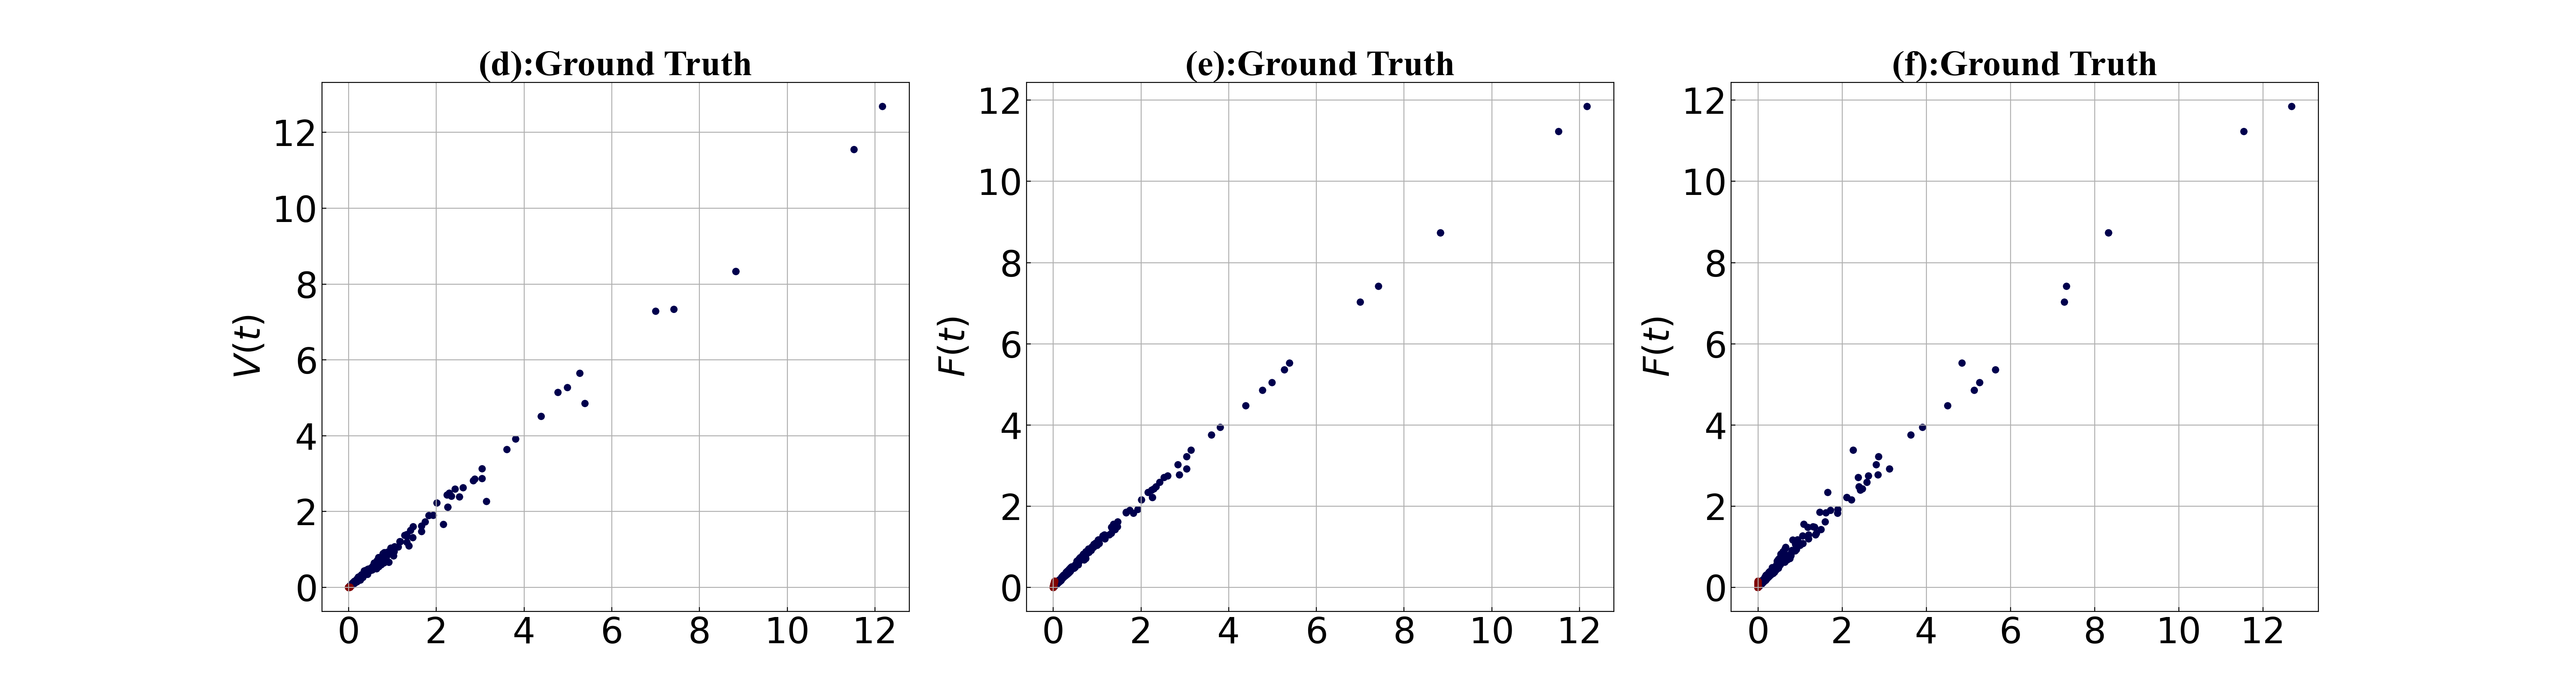

In [20]:
#2 Dimensional Plots
%matplotlib notebook  

plt.figure(figsize=(30, 8))
csfont = {'fontname':'Times New Roman'}

plt.subplot(1, 3, 1)
# st = plt.suptitle("suptitle", fontsize="x-large")
p1=plt.scatter(Xtest[["I2"]], Xtest[["V"]], c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
#p1=plt.scatter(Xtest[["I2"]], Xtest[["V"]], c=clf.predict(Xtest), s=150, marker='.', edgecolor='none',cmap='seismic')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.title('(d):Ground Truth',fontweight="bold",**csfont,size=30)
# plt.title('(e):Prediction',fontweight="bold",**csfont,size=25)
# plt.xlabel('$I_2(t)$',fontweight="bold",**csfont,size=30)
plt.ylabel('$V(t)$',fontweight="bold",**csfont,size=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.colorbar()
# plt.clim(0, 1);
plt.grid(True)

plt.subplot(1, 3, 2)
p2=plt.scatter(Xtest[["I2"]], Xtest[["F"]],c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.title('(e):Ground Truth',fontweight="bold",**csfont,size=30)
# plt.xlabel('$I_2(t)$',fontweight="bold",**csfont,size=30)
plt.ylabel('$F(t)$',fontweight="bold",**csfont,size=30)
# plt.colorbar(extend='both')
# plt.colorbar(extend='both',orientation="horizontal")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.clim(0, 1);
plt.grid(True)

plt.subplot(1, 3, 3)
p1=plt.scatter(Xtest[["V"]], Xtest[["F"]],c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.title('(f):Ground Truth',fontweight="bold",**csfont,size=30)
# plt.xlabel('$V(t)$',fontweight="bold",**csfont,size=30)
plt.ylabel('$F(t)$',fontweight="bold",**csfont,size=30)
# cbar=plt.colorbar(extend='both')
# tick_font_size = 25
# cbar.ax.tick_params(labelsize = tick_font_size)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#Set the color limits
plt.clim(0, 1);
plt.grid(True)
plt.show()
# plt.savefig("/Users/Owner/Desktop/2DE3.pdf",bbox_inches='tight')
#######################################################################
# plt.figure(figsize=(30, 6.5))
# plt.subplot(1, 4, 1)
# p1=plt.scatter(Xtest[["I1"]], Xtest[["I2"]], c=clf.predict(Xtest), s=150, marker='.', edgecolor='none', cmap='seismic')
# #p1=plt.scatter(Xtest[["I1"]], Xtest[["I2"]], c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
# plt.tick_params(axis='x',direction='in')
# plt.tick_params(axis='y',direction='in')
# plt.title('(a):Prediction',fontweight="bold",**csfont,size=30)
# plt.xlabel('$I_1(t)$',fontweight="bold",**csfont,size=30)
# plt.ylabel('$I_2(t)$',fontweight="bold",**csfont,size=30)
# # plt.colorbar()
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# # plt.clim(0, 1);
# plt.grid(True)


# plt.subplot(1, 4, 2)
# p1=plt.scatter(Xtest[["I1"]], Xtest[["T"]], c=clf.predict(Xtest), s=150, marker='.', edgecolor='none', cmap='seismic')
# plt.tick_params(axis='x',direction='in')
# plt.tick_params(axis='y',direction='in')
# plt.title('(b):Prediction',fontweight="bold",**csfont,size=30)
# plt.xlabel('$I_1(t)$',fontweight="bold",**csfont,size=30)
# plt.ylabel('$T(t)$',fontweight="bold",**csfont,size=25)
# # plt.colorbar()
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=20)
# # plt.clim(0, 1);
# plt.grid(True)

# plt.subplot(1, 4, 3)
# p1=plt.scatter(Xtest[["I1"]], Xtest[["V"]], c=clf.predict(Xtest), s=150, marker='.', edgecolor='none', cmap='seismic')
# plt.tick_params(axis='x',direction='in')
# plt.tick_params(axis='y',direction='in')
# plt.title('(c):Prediction',fontweight="bold",**csfont,size=30)
# plt.xlabel('$I_1(t)$',fontweight="bold",**csfont,size=30)
# plt.ylabel('$V(t)$',fontweight="bold",**csfont,size=30)
# # plt.colorbar(extend='both')
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# # plt.colorbar(extend='both',orientation="horizontal")
# # plt.clim(0, 1);
# plt.grid(True)


# plt.subplot(1, 4, 4)
# p2=plt.scatter(Xtest[["I1"]], Xtest[["F"]],c=clf.predict(Xtest), s=150, marker='.', edgecolor='none', cmap='seismic')
# plt.tick_params(axis='x',direction='in')
# plt.tick_params(axis='y',direction='in')
# plt.title('(d):Prediction',fontweight="bold",**csfont,size=25)
# plt.xlabel('$I_1(t)$',fontweight="bold",**csfont,size=30)
# plt.ylabel('$F(t)$',fontweight="bold",**csfont,size=30)
# cbar=plt.colorbar(extend='both')
# tick_font_size = 25
# cbar.ax.tick_params(labelsize = tick_font_size)
# plt.xticks(fontsize=25)
# plt.yticks(fontsize=25)
# # plt.colorbar(extend='both',orientation="horizontal")
# plt.clim(0, 1);
# plt.grid(True)

# plt.savefig("/Users/Owner/Desktop/2D6.pdf",bbox_inches='tight')

<IPython.core.display.Javascript object>


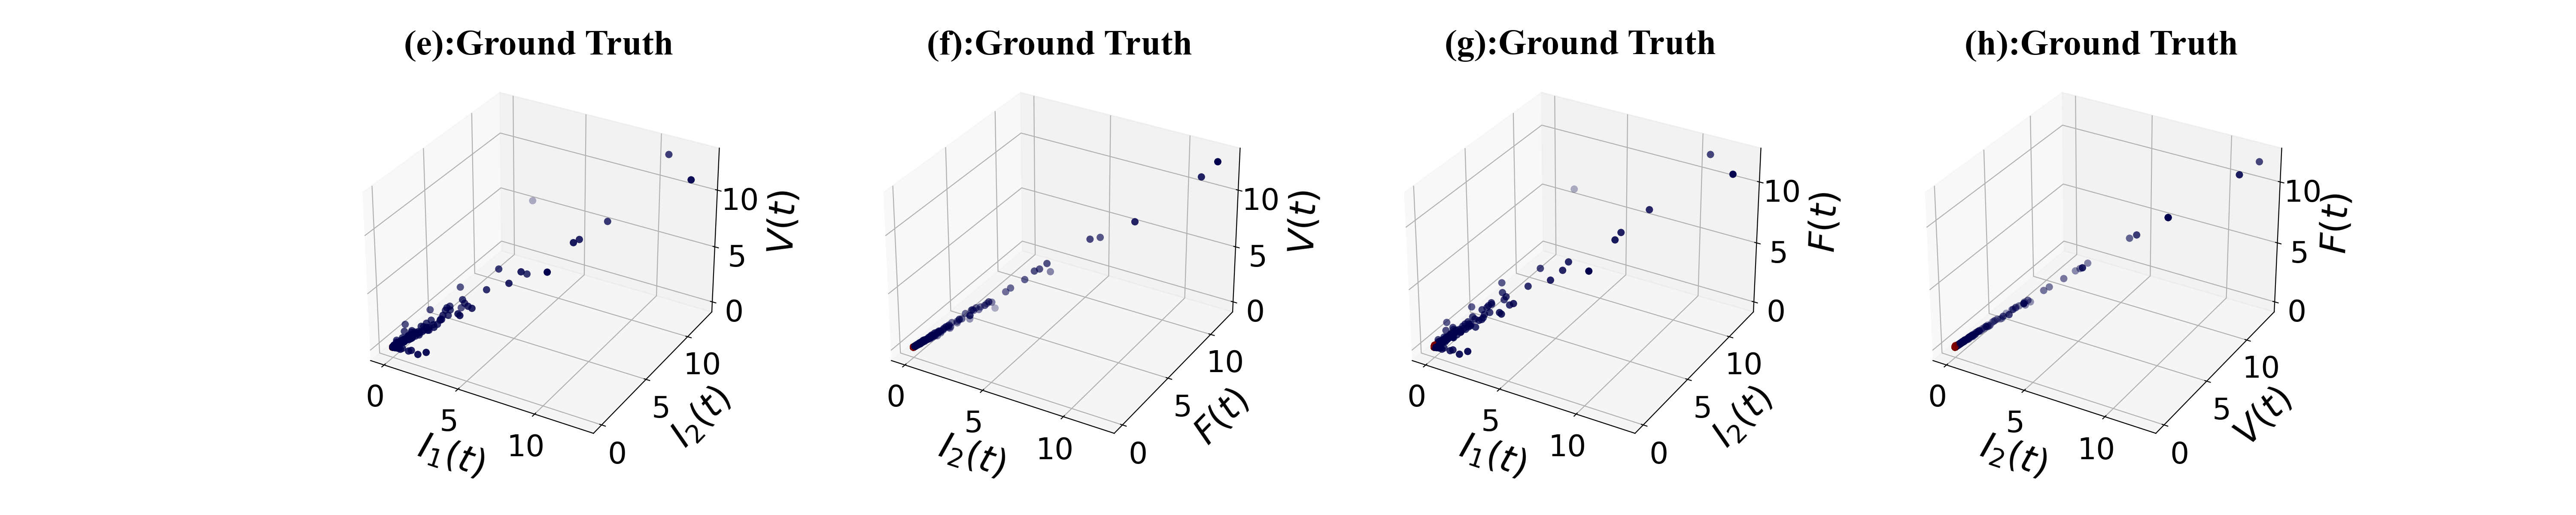

In [21]:
#3 Dimensional Plots
from mpl_toolkits.mplot3d import axes3d

#Visualization with Matplotlib:
%matplotlib notebook 



# fig = plt.figure(figsize=plt.figaspect(0.5))
# # fig=plt.figure(figsize=(10, 6))
fig=plt.figure(figsize=(30, 6))
csfont = {'fontname':'Times New Roman'}

xdata=Xtest[["I1"]]
ydata=Xtest[["I2"]]
zdata=Xtest[["V"]]


ax = fig.add_subplot(1, 4, 1, projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
ax.set_title('(e):Ground Truth',fontweight="bold",**csfont,size=30)
ax.set_xlabel('$I_1(t)$',**csfont,size=30, labelpad=15)
ax.set_ylabel('$I_2(t)$',**csfont,size=30, labelpad=15)
ax.set_zlabel('$V(t)$',**csfont,size=30, labelpad=15)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.tick_params(axis="z", labelsize=25)


xdata=Xtest[["I2"]]
ydata=Xtest[["F"]]
zdata=Xtest[["V"]]

ax = fig.add_subplot(1, 4, 2, projection='3d')
#ax.scatter3D(xdata, ydata, zdata, c=clf.predict(Xtest), s=150, marker='.', edgecolor='none', cmap='seismic')
ax.scatter3D(xdata, ydata, zdata, c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
ax.set_title('(f):Ground Truth',fontweight="bold",**csfont,size=30)
ax.set_xlabel('$I_2(t)$',**csfont,size=30, labelpad=15)
ax.set_ylabel('$F(t)$',**csfont,size=30, labelpad=15)
ax.set_zlabel('$V(t)$',**csfont,size=30, labelpad=15)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.tick_params(axis="z", labelsize=25)


xdata=Xtest[["I1"]]
ydata=Xtest[["I2"]]
zdata=Xtest[["F"]]

ax = fig.add_subplot(1, 4, 3, projection='3d')
ax.scatter3D(xdata, ydata, zdata, c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
ax.set_title('(g):Ground Truth',fontweight="bold",**csfont,size=30)
ax.set_xlabel('$I_1(t)$',**csfont,size=30,labelpad=15)
ax.set_ylabel('$I_2(t)$',**csfont,size=30,labelpad=15)
ax.set_zlabel('$F(t)$',**csfont,size=30,labelpad=15)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.tick_params(axis="z", labelsize=25)




xdata=Xtest[["I2"]]
ydata=Xtest[["V"]]
zdata=Xtest[["F"]]

ax = fig.add_subplot(1, 4, 4, projection='3d')
ax.scatter3D(xdata, ydata, zdata,  c=ytest, s=150, marker='.', edgecolor='none', cmap='seismic')
ax.set_title('(h):Ground Truth',fontweight="bold",**csfont,size=30)
ax.set_xlabel('$I_2(t)$',**csfont,size=30, labelpad=15)
ax.set_ylabel('$V(t)$',**csfont,size=30, labelpad=15)
ax.set_zlabel('$F(t)$',**csfont,size=30, labelpad=10)
# ax.set_xticks(fontsize=25)
ax.tick_params(axis="x", labelsize=25)
ax.tick_params(axis="y", labelsize=25)
ax.tick_params(axis="z", labelsize=25)
# ax.set_yticks(fontsize=25)
# ax.set_xticks(fontsize=25)
# plt.zticks(fontsize=25)


# plt.savefig("/Users/Owner/Desktop/3D3.pdf", dpi=150,bbox_inches='tight')


plt.show()